In [1]:
%matplotlib inline

from ast import literal_eval
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.8f}'.format
sns.set(font="Meiryo")

# საწყისი ცხრილი

ცხრილის მონაცემები, სადაც კორპუსიდან ამოღბულია სიტყვის ყველა შესაძლო მახასიათებელი. მათ შორის ლემების და მეტყველების ნაწილაკებიხ რამოდენიმე ვარიანტი

In [2]:
df = pd.read_csv('csv/adv_dict.csv')
df[:100]

,word_init,word_mod,lemma_basic,lemma_adv,pos_tag,freq
0,ამ,ამ,"{'??', '\t', 'ეს'}","{'??', 'ეს'}","{'Pron', 'Dem', 'Gen', 'Erg', 'Prop', 'Inst', ...",1041654
1,ზამთრის,ზამთრის,"{'ზამთარი', 'ზამთარ·ი'}","{'ზამთ[ა]რ-ი', 'ზამთ[ა]რ·ი'}","{'Gen', 'Sg', 'LevGuess', 'Temp', 'N'}",8035
2,მიწურულს,მიწურულს,"{'მი·წურულ·ი', 'მიწურული', 'მიწურულ·ი'}","{'მიწურულ·ი', 'მი-წურულ-ი/წურ', 'მიწურულ-ი', '...","{'Pv', 'Sg', 'A', 'PastPart', 'LevGuess', 'Dat...",5976
3,თითქმის,თითქმის,{'თითქმის'},{'თითქმის'},"{'LevGuess', 'Adv', 'DegNum', 'Deg'}",62608
4,სასოწარკვეთილი,სასოწარკვეთილი,"{'სასოწარკვეთილ·ი', 'სასოწარკვეთილი'}","{'სასოწარკვეთილ·ი', 'სასოწარკვეთილ-ი'}","{'Gen', 'Att', 'A', 'Nom', 'Sg', 'Inst', 'LevG...",844
...,...,...,...,...,...,...
95,ხომ,ხომ,{'ხომ'},{'ხომ'},"{'Disc', 'Adv'}",127578
96,ვსაყვედურობდი,ვსაყვედურობდი,"{'საყვედურ·ი', 'საყვედური'}","{'საყვედურ-ი/საყვედურ', 'საყვედურ·ი/საყვედურ'}","{'<S:Nom>', 'S:1Sg', 'V', 'MedAct', '<S-IO>', ...",19
97,საწინააღმდეგო,საწინააღმდეგო,{'საწინააღმდეგო'},{'საწინააღმდეგო'},"{'Gen', 'Erg', 'Att', 'A', 'Nom', 'Inst', 'Sg'...",9474
98,გაქვს,გაქვს,{'ქონა'},{'ქონ[ა]/ქვ'},"{'DO:3', '<DO:Nom>', 'V', 'Inv', '<S:Dat>', 'S...",8972


In [3]:
print(f'number of words: {df.shape[0]}')

number of words: 2635260


## ცხრილის გასუფთავება

### სიტყვები

In [4]:
df['diff'] = np.where(df['word_init'] != df['word_mod'], 1, 0)
diff = df[df['diff'] == 1]
print(f'number of words with different "word_init" and "word_mod" forms: {diff.shape[0]}')
diff[:100]

number of words with different "word_init" and "word_mod" forms: 39066


,word_init,word_mod,lemma_basic,lemma_adv,pos_tag,freq,diff
163,ფანტავდა~,ფანტავდა,{'*·ფანტვა'},{'*·ფანტვ[ა]/ფანტ'},"{'<S:Nom>', 'DO:3', 'S:3Sg', 'V', '<DO:Dat>', ...",50,1
177,სტაბეკს,სტაშეკს,{'სტაშეკ'},{'სტაშეკ'},"{'Prop', 'Anthr', 'Dialect', 'LevGuess', 'Firs...",8,1
219,დამკვიდრა,დამკვიდრდა,"{'დამკვიდრება', 'და·მკვიდრება'}","{'და·მკვიდრებ[ა]/მკვიდრ', 'და-მკვიდრებ[ა]/მკვი...","{'Pv', '<S:Nom>', 'S:3Sg', 'V', '<S>', 'LevGue...",2083,1
333,დავბოდიალობდი,დავბორიალობდი,{'და·ბორიალ·ი'},{'და·ბორიალ·ი/ბორიალ'},"{'Pv', '<S:Nom>', 'S:1Sg', 'V', 'MedAct', '<S>...",22,1
428,მქონებოდა,მგონებოდა,{'გონება'},{'გონებ[ა]/გონ'},"{'DO:3', '<DO:Nom>', 'V', 'Inv', '<S:Dat>', '<...",19,1
...,...,...,...,...,...,...,...
6535,გავვოცდი,გავოცდი,{'გა·ოცება'},{'გა·ოცებ[ა]/ოც'},"{'Pv', '<S:Nom>', 'S:1Sg', 'V', '<S>', 'LevGue...",288,1
6541,ახვრებს,ახარებს,"{'ხარება', '*·ხარება', 'გა·ხარება'}","{'გა·ხარებ[ა]/ხარ', '*·ხარება', '*·ხარებ[ა]/ხარ'}","{'<S:Nom>', 'DO:3', 'S:3Sg', 'V', '<S-DO-IO>',...",591,1
6742,მხირულება,მხიარულება,{'მხიარულება'},{'მხიარულებ[ა]'},"{'Sg', 'Nom', 'Voc', 'LevGuess', 'N'}",448,1
6854,ფონოკაბინეტს,ფოტოკაბინეტს,{'ფოტოკაბინეტ·ი'},{'ფოტოკაბინეტ·ი'},"{'LevGuess', 'Dat', 'Sg', 'N'}",2,1


ზოგ შემთხვევაში "word_mod"-ში მოცემული გვაქვს "word_init" ფორმის ანუ რაც ტექსტში იყო მოცემული საწყისად მისი გასწორებული ვარიანტი. დამკვიდრა -> დამკვიდრდა ან გავვოცდი -> გავოცდი, მხირულება -> მხიარულება. თუმცა ზოგიერთ შემთხვევაში ძირფესვიანი ცვლილება ხდება სიტყვის მქონებოდა -> მგონებოდა ან ახვრებს -> ახარებს ;დდდ. ყველა შემთხვევაში ლემები გვაქვს სიტყვის სახეცვლილი/ გასწორებული ფორმის და არა იმ ფორმის რაც რეალურად ტექტში იყო ანუ გამართული ქართული სიტყვს. აქედან გამომდინარე შეგვიძლია საწყისი ველი დავდროფოთ საერთოდ. 

In [5]:
df = df.drop(['word_init', 'diff'], axis=1)
df = df.rename(columns={'word_mod': 'word'})
df = df.dropna(subset=['word'])
df[:100]

,word,lemma_basic,lemma_adv,pos_tag,freq
0,ამ,"{'??', '\t', 'ეს'}","{'??', 'ეს'}","{'Pron', 'Dem', 'Gen', 'Erg', 'Prop', 'Inst', ...",1041654
1,ზამთრის,"{'ზამთარი', 'ზამთარ·ი'}","{'ზამთ[ა]რ-ი', 'ზამთ[ა]რ·ი'}","{'Gen', 'Sg', 'LevGuess', 'Temp', 'N'}",8035
2,მიწურულს,"{'მი·წურულ·ი', 'მიწურული', 'მიწურულ·ი'}","{'მიწურულ·ი', 'მი-წურულ-ი/წურ', 'მიწურულ-ი', '...","{'Pv', 'Sg', 'A', 'PastPart', 'LevGuess', 'Dat...",5976
3,თითქმის,{'თითქმის'},{'თითქმის'},"{'LevGuess', 'Adv', 'DegNum', 'Deg'}",62608
4,სასოწარკვეთილი,"{'სასოწარკვეთილ·ი', 'სასოწარკვეთილი'}","{'სასოწარკვეთილ·ი', 'სასოწარკვეთილ-ი'}","{'Gen', 'Att', 'A', 'Nom', 'Sg', 'Inst', 'LevG...",844
...,...,...,...,...,...
95,ხომ,{'ხომ'},{'ხომ'},"{'Disc', 'Adv'}",127578
96,ვსაყვედურობდი,"{'საყვედურ·ი', 'საყვედური'}","{'საყვედურ-ი/საყვედურ', 'საყვედურ·ი/საყვედურ'}","{'<S:Nom>', 'S:1Sg', 'V', 'MedAct', '<S-IO>', ...",19
97,საწინააღმდეგო,{'საწინააღმდეგო'},{'საწინააღმდეგო'},"{'Gen', 'Erg', 'Att', 'A', 'Nom', 'Inst', 'Sg'...",9474
98,გაქვს,{'ქონა'},{'ქონ[ა]/ქვ'},"{'DO:3', '<DO:Nom>', 'V', 'Inv', '<S:Dat>', 'S...",8972


ამ ყველაფერთან ერთად გვაქვს სიტყვები, რომლებიც, არასწორადაა ამოჭრილი. მაგ: (სიტყვა, ლათინ- და ა.შ. ანუ შეიცავს ასეობის და რიცხვების გარდა სხვა აღმნიშვნელ ნაწილებს და მისი სხვა ფორმა უკვე მოიძებნება კორპუსში. ესეიგი ეს არ შეეხება კომპოზიტებს, რომლებიც ცალსახად დეფისით იწერება.

In [6]:
words = set(df['word'])
malformed_words = set()
malformed_word_indecies = list()
def extract(row):
    x = row['word']
    noise = re.compile(r'\W', re.UNICODE)
    try:
        word = noise.sub(r'', x)
        if word.isnumeric():
            return
        composite = x.split('-')  # check if word is a composite
        if len(composite) == 2 and ((composite[0] in words and composite[1] in words) or (composite[1].startswith(composite[0]))):
            return
        if all(map(lambda x: len(x) == 1, x.split('.'))):  # check for abbreviation and initials
            return
        if word != x and word in words:
            malformed_words.add((x, word))
            malformed_word_indecies.append(row.name)
    except Exception:
        print(x)
    
            
df.apply(extract, axis=1)
print(f"Number of malformed words: {len(malformed_words)}")


Number of malformed words: 75023


In [7]:
for i, word in enumerate(malformed_words):
    if i == 50:
        break
    print(word)

('ვაი-უშველებელში', 'ვაიუშველებელში')
('ნა„', 'ნა')
('დახმარებისათვის-', 'დახმარებისათვის')
('დისკი-', 'დისკი')
('მზისმეტყველება”', 'მზისმეტყველება')
('პროექტის-', 'პროექტის')
('გავზრდით.“', 'გავზრდით')
('გაძვირება.“', 'გაძვირება')
('აწ-ყობს', 'აწყობს')
('-ვარდისფერი-', 'ვარდისფერი')
('დაიჯერებო.“', 'დაიჯერებო')
('მშვიდობიანი(!)', 'მშვიდობიანი')
('ა-ღორ-ძინება', 'აღორძინება')
('ყველამ.“', 'ყველამ')
('(ბრუნ)ჰილდა”', 'ბრუნჰილდა')
('აქაურობას.-', 'აქაურობას')
('ძლიერდება.”', 'ძლიერდება')
('გაიღო-', 'გაიღო')
('ბარ-ძაყიც', 'ბარძაყიც')
('ვაჟა-ფშაველა:„', 'ვაჟაფშაველა')
('აყოლილები.“', 'აყოლილები')
('…რათა', 'რათა')
('დაწყებისა.“', 'დაწყებისა')
('ინტერნეშენლ“', 'ინტერნეშენლ')
('“.თეთრ', 'თეთრ')
('ჭირიმე.', 'ჭირიმე')
('შესახებ..“', 'შესახებ')
('ნ.გ.', 'ნგ')
('შეხვედრ-ებში', 'შეხვედრებში')
('მას-წავლებლობდა', 'მასწავლებლობდა')
('მიწაზე.“', 'მიწაზე')
('მენდელეე-ვი', 'მენდელეევი')
('აღმოსავლეთ-', 'აღმოსავლეთ')
('დადგებით.”', 'დადგებით')
('?რის', 'რის')
('განკარ-გავენ', 'განკარგავენ')
('”რაცა', 'რ

შეგვიძლია ასეთი დეფორმირებული სიტყვები ამოვიღოთ სიიდან.

In [8]:
df = df.drop(malformed_word_indecies).reset_index(drop=True)
df.shape

(2560235, 5)

ასევე ბლომად გვაქვს მოცემული არაქართული სიტყვები და სიტყვები სადაც ქართული ანბანიდან ამოღებული ასოებია გამოყენებული ან სიტყვები, რომლებიც უბრალოდ 

In [9]:
words = set(df['word'])
malformed_words = set()
malformed_word_indecies = list()
def extract(row):
    word = row['word']
    noise = re.compile(r'[^ა-ჰ0-9-]+', re.UNICODE)
    number_or_time = re.compile(r'([0-9]+[.,:-]?)+', )
    try:
        if noise.search(word) is not None and number_or_time.match(word) is None:
            malformed_words.add(word)
            malformed_word_indecies.append(row.name)
    except Exception:
        print(word)
            
df.apply(extract, axis=1)
print(f"Number of malformed words: {len(malformed_words)}")

Number of malformed words: 175383


In [10]:
for i, word in enumerate(malformed_words):
    if i == 50:
        break
    print(word)

Inglourious
ეძლეოდა.სტატიაში
instrumental
ა.კომახიძე
дискуссии
ბიასი-6.5
გაგრძელებას.ბიძინა
კეთილმოტ….”
Cognomen
дряхлеют
Противник
qveynebiქქვეყა
pater
†160
იმსჯელებს.პრაიმ-ნიუსთან
სიცილს.როგორც
Valeriu
SoHo
ისფაჰანში.ასეთი
NBA-საც
ქ.N4
Eხტენსიონს
dgiurebis
Mi-2
ხნჯ^
Irvin
Sealed
+2,2
style=ʼwidth:287.25pt
К
(HRW)-ის
devant
გახსნით.ასე
ურვისაჲ
განთჳსებულთა
тогдашнее
ნაწილი.ჰილარი
Curriculum
“(1062)
ისვენებენ.Kმაესტრო
!ოშ0-შპ#
…3
IES-თან
მ.გონაშვილმა
Variety
Fl.Arr
ნ`დოე-
Yთუმცა
CSX-ის
euobserver-ი


In [11]:
df = df.drop(malformed_word_indecies).reset_index(drop=True)
df.shape

(2384852, 5)

### მეტყველების ნაწილის თეგები

ვინაიდან ცხრილში pos_tag-ზე გვაქვს ყველა შესაძლო კონტექსტში გამოყენებულ სიტყვაზე ინფორმაცია, თუ რომელ მეტყველების ნაწილს მიეკუთვნება. უკონტექსტოდ ეს ინფორმაცია არ იქნება გამოსადეგი ჩვენთვის. პირველადი ვარაუდი მქონდა, რომ არ შეიძლებოდა უმეტესობა სიტყვა მოაზრებული ყოფილიყო რამდენიმე მეტყველების ნაწილად სხვადასხვა კონტექსტში, ფორმების განსხვავებულობის გამო. თუმცა, როგორც მაგალითებიდან ვხედავთ ასე არ ხდება ამ კორპუსში:

In [12]:
df[df['word'] == 'მივდივარ']['pos_tag']

6820    {'Pv', '<S:Nom>', 'S:3Pl', '<DO:Nom>', 'S:3Sg'...
Name: pos_tag, dtype: object

In [13]:
df[df['word'] == 'სასოწარკვეთილი']['pos_tag']

4    {'Gen', 'Att', 'A', 'Nom', 'Sg', 'Inst', 'LevG...
Name: pos_tag, dtype: object

ერთ შემთხვევაში ცალსახად ზმნა ასევე, არსებით სახელადაცაა მონიშნული, მეორე შემთხვევაში აშკარა ზედსართავი სახელი არსებით სახელად, აქედან გამომდინარე უმჯობესი იქნება თუ უკონტექსტოდ არ გვექნება pos_tag-ი გამოყენებული.

In [14]:
df = df.drop(['pos_tag'], axis=1)
df[:100]

,word,lemma_basic,lemma_adv,freq
0,ამ,"{'??', '\t', 'ეს'}","{'??', 'ეს'}",1041654
1,ზამთრის,"{'ზამთარი', 'ზამთარ·ი'}","{'ზამთ[ა]რ-ი', 'ზამთ[ა]რ·ი'}",8035
2,მიწურულს,"{'მი·წურულ·ი', 'მიწურული', 'მიწურულ·ი'}","{'მიწურულ·ი', 'მი-წურულ-ი/წურ', 'მიწურულ-ი', '...",5976
3,თითქმის,{'თითქმის'},{'თითქმის'},62608
4,სასოწარკვეთილი,"{'სასოწარკვეთილ·ი', 'სასოწარკვეთილი'}","{'სასოწარკვეთილ·ი', 'სასოწარკვეთილ-ი'}",844
...,...,...,...,...
95,გადავეხვიე,{'გადა·ხვევა'},{'გადა·ხვევ[ა]/ხვ'},35
96,შუბლზე,"{'შუბლი', 'შუბლ·ი'}","{'შუბლ·ი', 'შუბლ-ი'}",1697
97,ვაკოცე,{'კოცნა'},{'კოცნ[ა]/კოც'},174
98,როგორც,"{'როგორც', 'როგორც კი'}","{'როგორც', 'კი'}",478016


### ლემები

#### ულემო სიტყვები

In [15]:
no_lemma = df[(df['lemma_basic'] == "{'??'}") & (df['lemma_adv'] == "{'??'}")]
print(f'Number of words without lemmas: {no_lemma.shape[0]}')
print(f'Frequency of words without lemmas: {no_lemma["freq"].sum()}, prct: {no_lemma["freq"].sum() / df["freq"].sum() * 100}%')
print(f'The most frequent words without lemma:')
no_lemma.sort_values(by=['freq'], ascending=False)[: 100]

Number of words without lemmas: 910909
Frequency of words without lemmas: 3745518, prct: 2.3720464719763865%
The most frequent words without lemma:


,word,lemma_basic,lemma_adv,freq
767714,ვიტ,{'??'},{'??'},8375
877574,ინტერ-პრესი,{'??'},{'??'},6784
901566,პრაიმ-ნიუსი,{'??'},{'??'},5833
526919,ჩელსის,{'??'},{'??'},5563
395527,ქართულ-აფხაზური,{'??'},{'??'},5375
...,...,...,...,...
102988,მიგელ,{'??'},{'??'},1187
66934,კოული,{'??'},{'??'},1183
985215,მედია-ნიუსს,{'??'},{'??'},1177
411266,რონალდ,{'??'},{'??'},1172


როგორც ვხედავთ, იმის მიუხედავად, რომ კორპუსში არსებული სიტყვების ნახევარს საერთოდ არ აქვს ლემმა. ისინი გამოყენების სიხშირით კორპუსის მხოლოდ 2%-ს შეადგენენ. ამასთან ერთად როგორც ვხედავთ pos-tag-იც კი არასწორად აქვთ შესაბამებული. მაგ: ანტირუსული სახელად არის წარმოდგენილი და ა.შ. ტრენინგისთვის სრულიად გამოუსადეგარი იქნება ამიტომაც ასეთ სიტყვებსაც ვდროფავ.

In [16]:
df = df.drop(no_lemma.index).reset_index(drop=True)
print(f'Number of words left: {df.shape[0]}')
df[:100]

Number of words left: 1473943


,word,lemma_basic,lemma_adv,freq
0,ამ,"{'??', '\t', 'ეს'}","{'??', 'ეს'}",1041654
1,ზამთრის,"{'ზამთარი', 'ზამთარ·ი'}","{'ზამთ[ა]რ-ი', 'ზამთ[ა]რ·ი'}",8035
2,მიწურულს,"{'მი·წურულ·ი', 'მიწურული', 'მიწურულ·ი'}","{'მიწურულ·ი', 'მი-წურულ-ი/წურ', 'მიწურულ-ი', '...",5976
3,თითქმის,{'თითქმის'},{'თითქმის'},62608
4,სასოწარკვეთილი,"{'სასოწარკვეთილ·ი', 'სასოწარკვეთილი'}","{'სასოწარკვეთილ·ი', 'სასოწარკვეთილ-ი'}",844
...,...,...,...,...
95,შუბლზე,"{'შუბლი', 'შუბლ·ი'}","{'შუბლ·ი', 'შუბლ-ი'}",1697
96,ვაკოცე,{'კოცნა'},{'კოცნ[ა]/კოც'},174
97,როგორც,"{'როგორც', 'როგორც კი'}","{'როგორც', 'კი'}",478016
98,ჩანს,"{'ჩანი', 'ჩან·ი', '*·ჩენა', '*ჩენა'}","{'ჩან·ი', 'ჩან-ი', '*-ჩენ[ა]/ჩან', '*·ჩენ[ა]/ჩ...",57172


#### განსხვავებული ტიპის ლემები

In [17]:
print(df[df['word'] == 'ჭამა'][['word', 'lemma_adv', 'lemma_basic']])
print(df[df['word'] == 'ჭამს'][['word', 'lemma_adv', 'lemma_basic']])

       word               lemma_adv     lemma_basic
18217  ჭამა  {'ჭამ[ა]/ჭამ', 'ჭ[ა]'}  {'ჭამა', 'ჭა'}
       word       lemma_adv lemma_basic
11963  ჭამს  {'ჭამ[ა]/ჭამ'}    {'ჭამა'}


ძალიან უცნაური ლემები აქვთ ზოგიერთ შემთხვევაში ამა თუ იმ სიტყვას. არ ვიცი რა კონტექსტში შეიძლება იყოს ჭამა ჭის რაიმე ფორმა. (ერთადერთი რაც მახსენდება შესაძლებელია ჭამ (ჭის მოთხრობითი ბრუნვა და ჭამის მეორე პირის მხოლობითი ფორმა ორივე ნაირად იქნას ინტერპრეტრებული.)) ამასთან ერთად lemma_basic-ში არის სიტყვის არსებითი სახელის ფორმა არჩეული ლემად. სახელზმნის შემთხვევაში. ხოლო lemma_adv-ში "არსებითი სახელი\ზმნის ბუძე" ფორმატი, მიუხედავად იმისა სიტყვა, რომელიც დაგვყავს ზმნადაა მოცემული და არსებით სახელად. და დამატებით აღნიშნულია, მოცილებადი ნაწილი სიტყვის. შესაბამისად მხოლოდ ინფორმატიულ დატვირთვას ატარებს და მარტივი ლემის სხვანაირად წარმოდგენას განასახიერებს.

In [18]:
def tryconvert(x):
    try:
        return len(literal_eval(x))
    except Exception:
        return 0
    
df['diff'] = np.where(df['lemma_basic'].apply(lambda x: len(literal_eval(x))) 
                      != df['lemma_adv'].apply(lambda x: tryconvert(x)) , 1, 0)
diff = df[df['diff'] == 1]
print(diff.shape[0])
diff[:100]

31021


,word,lemma_basic,lemma_adv,freq,diff
0,ამ,"{'??', '\t', 'ეს'}","{'??', 'ეს'}",1041654,1
2,მიწურულს,"{'მი·წურულ·ი', 'მიწურული', 'მიწურულ·ი'}","{'მიწურულ·ი', 'მი-წურულ-ი/წურ', 'მიწურულ-ი', '...",5976,1
5,გახლდით,{'ხლება'},"{'ხლებ[ა]/ახლ', 'ხლებ[ა]/ხლ'}",1689,1
6,რა,"{'რა თქმა უნდა', '\t', 'რა', '??'}","{'უნდა', 'რ[ა]', 'რა', '??', 'თქმა'}",418777,1
7,ხანია,"{'ხანი', 'ხან·ი'}","{'ხ[ა]ნ-ი', 'ხან·ი', 'ხ[ა]ნ·ი'}",24507,1
...,...,...,...,...,...
1213,ვალი,"{'ვალი', 'ვალ·ი'}","{'ვალი', 'ვალ-ი', 'ვალ·ი'}",5625,1
1214,გაწევს,"{'გა·წევა', '*·წოლა'}",{'გა·წევ[ა]/წ[ევ]'},58,1
1223,მილკა,{'მილკა'},"{'მილკა', 'მილკ[ა]'}",20,1
1230,ზმანებათა,{'ზმანება'},"{'ზმანებ[ა]/ზმან', 'ზმანებ[ა]'}",26,1


როგორც ვხედავთ ძირითადად ორივე ლემის ტიპში დამთხვევები გვაქ, ლემების რაოდენობის მხრივ, თუმცა 33205 სიტყვაში საქმე სხვაგვარადაა.

In [19]:
print(df[df['word'] == 'ხანია'][['word', 'lemma_adv', 'lemma_basic']])

    word                        lemma_adv        lemma_basic
7  ხანია  {'ხ[ა]ნ-ი', 'ხან·ი', 'ხ[ა]ნ·ი'}  {'ხანი', 'ხან·ი'}


In [20]:
df = df.drop(['lemma_adv', 'diff'], axis=1)
df = df.rename(columns={'lemma_basic': 'lemma'})
df[:100]

,word,lemma,freq
0,ამ,"{'??', '\t', 'ეს'}",1041654
1,ზამთრის,"{'ზამთარი', 'ზამთარ·ი'}",8035
2,მიწურულს,"{'მი·წურულ·ი', 'მიწურული', 'მიწურულ·ი'}",5976
3,თითქმის,{'თითქმის'},62608
4,სასოწარკვეთილი,"{'სასოწარკვეთილ·ი', 'სასოწარკვეთილი'}",844
...,...,...,...
95,შუბლზე,"{'შუბლი', 'შუბლ·ი'}",1697
96,ვაკოცე,{'კოცნა'},174
97,როგორც,"{'როგორც', 'როგორც კი'}",478016
98,ჩანს,"{'ჩანი', 'ჩან·ი', '*·ჩენა', '*ჩენა'}",57172


#### ლემის ფორმა

In [21]:
print(f"Word: წამოვდექი  Lemma: {df[df['word'] == 'წამოვდექი']['lemma']}")
print(f"Word: ავდექი  Lemma: {df[df['word'] == 'ავდექი']['lemma']}")
print(f"Word: დავდექი  Lemma: {df[df['word'] == 'დავდექი']['lemma']}")
print(f"Word: ვდგავარ  Lemma: {df[df['word'] == 'ვდგავარ']['lemma']}")

Word: წამოვდექი  Lemma: 89    {'წამოდგომა', 'წამო·დგომა'}
Name: lemma, dtype: object
Word: ავდექი  Lemma: 9165    {'ა·დგომა', 'ადგომა'}
Name: lemma, dtype: object
Word: დავდექი  Lemma: 90625    {'და·დგომა'}
Name: lemma, dtype: object
Word: ვდგავარ  Lemma: 2322    {'დგომა'}
Name: lemma, dtype: object


როგორც ვხედავთ საინტერესო სიტყვათა ნათესაობა შეინიშნება ლემებში. საერთო ძირის მქონე სიტყვათა ჯგუფები აღნიშნულია შესაბამისად.

In [22]:
print(f"Word: ზამთარი  Lemma: {df[df['word'] == 'ზამთარი']['lemma']}")
print(f"Word: ზამთრული  Lemma: {df[df['word'] == 'ზამთრული']['lemma']}")
print(f"Word: დაზამთრდა  Lemma: {df[df['word'] == 'დაზამთრდა']['lemma']}")
print(f"Word: საზამთრო  Lemma: {df[df['word'] == 'საზამთრო']['lemma']}")

Word: ზამთარი  Lemma: 47444    {'ზამთარი', 'ზამთარ·ი'}
Name: lemma, dtype: object
Word: ზამთრული  Lemma: 1124123    {'ზამთრულ·ი'}
Name: lemma, dtype: object
Word: დაზამთრდა  Lemma: 313719    {'და·ზამთრება'}
Name: lemma, dtype: object
Word: საზამთრო  Lemma: 43533    {'საზამთრო'}
Name: lemma, dtype: object


In [23]:
print(f"Word: დაკავება  Lemma: {df[df['word'] == 'დაკავება']['lemma']}")
print(f"Word: დაკავებული  Lemma: {df[df['word'] == 'დაკავებული']['lemma']}")

Word: დაკავება  Lemma: 119973    {'დაკავება', 'და·კავება'}
Name: lemma, dtype: object
Word: დაკავებული  Lemma: 62949    {'დაკავებული', 'და·კავებულ·ი'}
Name: lemma, dtype: object


ზემოთა აღნიშნული ფაქტის მიუხედავად, ყველგან არ ჩანს მსგავსი ნათესაობა, ზოგან აშკარად საერთო ძირის მიუხედავად, მცირედი განსხვავებები შეინიშნება გამოყოფილ წერტილებით გამოყოფილ ნაწილებში. ამიტომაც, მიუხედავად იმისა, რომ საინტერესო იდეაა, ვფიქრობ, რომ ჯობია წერტილები დავკარგოთ ლემებიდან და შემდგომ თუ გაჩნდება ამის საჭიროება სხვა გზით მოვნახოთ საერთო ძირები ჩვეულებრივი ლემებიდან.

In [24]:
def remove_dot(x):
    return str({re.sub('·', '', word)for word in literal_eval(x)})

df['lemma'] = df['lemma'].apply(lambda x: remove_dot(x))
df[:100]

,word,lemma,freq
0,ამ,"{'\t', 'ეს', '??'}",1041654
1,ზამთრის,{'ზამთარი'},8035
2,მიწურულს,{'მიწურული'},5976
3,თითქმის,{'თითქმის'},62608
4,სასოწარკვეთილი,{'სასოწარკვეთილი'},844
...,...,...,...
95,შუბლზე,{'შუბლი'},1697
96,ვაკოცე,{'კოცნა'},174
97,როგორც,"{'როგორც კი', 'როგორც'}",478016
98,ჩანს,"{'ჩანი', '*ჩენა'}",57172


#### მრავალლემიანობა

In [25]:
df['lemma_count'] = df['lemma'].apply(lambda x: len(literal_eval(x)))
amb_lemmas = df[df['lemma_count'] != 1]
print(f'Number of words with ambigious lemmas: {amb_lemmas.shape[0]}')
amb_lemmas[:500]

Number of words with ambigious lemmas: 22298


,word,lemma,freq,lemma_count
0,ამ,"{'\t', 'ეს', '??'}",1041654,3
6,რა,"{'\t', 'რა', 'რა თქმა უნდა', '??'}",418777,4
9,უფროსი,"{'უფროსი', 'უფრო'}",23894,2
16,და,"{'და ასე შემდეგ', '\t', 'და', '??'}",5410387,4
21,მახარა,"{'მახარა', 'ხარება'}",75,2
...,...,...,...,...
4200,უნუგეშო,"{'უნუგეშო', 'ნუგეშება'}",208,2
4241,მკიდა,"{'*მკა', 'კიდება'}",12,2
4247,მკათათვე,"{'მკათათვე', 'მკა'}",19,2
4253,რაშებს,"{'რაშა', 'რაში'}",34,2


In [26]:
count = {}
def counter(x):
    for lemma in literal_eval(x.lemma):
        try:
            count[lemma].add(x.word)
        except KeyError:
            count[lemma] = {x.word}
    
df[['lemma', 'word']].apply(counter, axis=1)
lemmas_frame = pd.DataFrame(count.items(), columns=['lemma', 'lexems'])

In [27]:
lemmas_frame['count'] = lemmas_frame['lexems'].apply(len)

In [28]:
print(f'Number of unique lemmas {len(lemmas_frame)}')
lemmas_frame.sort_values(by='count', ascending=False)

Number of unique lemmas 212915


,lemma,lexems,count
0,\t,"{შანჟ, ტიგრან, ნივის, ჯარზეით, ფრისისკენ, აზიე...",6824
2,??,"{ტოლსტოიზე, სითბო-სიცივის, ტიგრან, ჯარზეით, და...",2701
1420,მიცემა,"{გაძლევდენ, მიუციათ, მიეცემოდაო, უძლევია, გაძლ...",811
1001,დაბრუნება,"{დავიბრუნოო, -დაბრუნებას, დაგვიბრუნდნენ, დაჰბრ...",680
276,კითხვა,"{ჰკითხეს, გკითხავთ, კითხვებიცა, კითხვად, ეკითხ...",620
...,...,...,...
128888,ჩამოწეწილჩამოგლეჯილი,{ჩამოწეწილ-ჩამოგლეჯილი},1
128887,არაძალმომრეობა,{არაძალმომრეობის},1
128885,ყვავიაშვილი,{ყვავიაშვილი},1
128883,დადგმეჳნება,{დაადგმევიენ},1


In [29]:
def word_to_lemma(word):
    return (df[df['word'] == word]['lemma'].item())
    
def lemma_to_words(lemma):
    return (lemmas_frame[lemmas_frame['lemma'] == lemma]['lexems'].item())
    

რამდენიმე ტიპის ლემები გვხვდება აქ, რომლებიც გადასგდებია: '??' (როგორც ამოუცნობი ლემების შემთხვევაში), '\t', ლემები რომლებიც რაიმე ფრაზას წარმოადგენს, იმის ნაცვლად, რომ თითო სიტყვას შეესაბამებოდეს. ამასთან ერთად ჩანს ლემებიც, რომელსაც შინაარსობრივი დატვირთვა არ გააჩნია, მიუხედავად იმის, რომ ლემა სიტყვის, რომელიმე ფორმა უნდა იყოს და შესაბამისად ასეთ დიდ კორპუსში ცალკე ხაზადაც უნდა იყოს წარმოდგენილი.

ლემები, რომლებიც ცალკეულ სიტყვად კორპუსში არ გვაქ მოცემული:

In [30]:
lemmas_not_present_as_words = set()
words = set(df['word'])
def extract(x):
    for lemma in literal_eval(x):
        if lemma not in words:
            lemmas_not_present_as_words.add(lemma)
    
df['lemma'].apply(extract)
print(f'Number of malformed lemmas: {len(lemmas_not_present_as_words)}')

Number of malformed lemmas: 56096


In [31]:
for i, lemma in enumerate(lemmas_not_present_as_words):
    if i == 50:
        break
    print(lemma)


ჩუმქარი
თარიმანიშვილი
კავშრი
მამიანი
ოთხასიათასი
დაჳდოვი
არასაპრეზიდენტოჲ
996097
ბატონება
ევრა
636კილომეტრიანი
რეფორმისტულ
აწუა
238000
157გვერდიანი
ამბრიანი
171204
გამძვრელი
7Eleven
ფლორა+ფაუნა
360400
ობა+კუ
104ქვემეხიანი
ქვემო ბოლნისი
განიორწყლებინება
01216
ტომრისმაგვარი
120250
*ტკბარუნება
ბიზნეს+ცენტრი
5ოთახიანი
195364
დაქოთქოთი
გადაბეჭდვინება
ბრედისნაირი
აღელუება
ჩიქჩიქი
14:2229
19811993
*რაცხვა
243.0
ახლობლიანი
აღალიანი
ს+ხათა
დვესტია
*მარტოვება
კენჭაკლდე
კვირაძალიანი
თათბი


In [32]:
lemma_to_words('შეწუხებინება')

{'ვაწუხებინებ', 'შეაწუხებინა'}

არც თუ ისე ცოტა ლემმა ასეთი სახის. თუმცა არ ვარ დარწმუნებული, როგორ უნდა მოვექცეთ ასეთ ლემებს. ზოგიერთი უბრალოდ არ მოიძენბება კორპუსში სავარაუდოდ მათი სიიშვიათიდან გამომდინარე, დანარჩენები კი ან ბოლო ხმოვანია სახეცვლილი მაგ: ზვირთება - ზვირთების ნაცვლად და ა.შ. 

რამოდენიმე ლემიანი სიტყვები:

In [33]:
print(f"Word: უნდა  Lemma: {word_to_lemma('უნდა')}")
print(f"Word: მინდა  Lemma: {word_to_lemma('მინდა')}")
print(f"Word: გვინდა  Lemma: {word_to_lemma('გვინდა')}")
print(f"Lemma: ნდომა Words: {lemma_to_words('ნდომა')}")
print(f"Lemma: ნდომა Words: {lemma_to_words('უნდა')}")

Word: უნდა  Lemma: {'უნდა', '\t', 'ნდომა'}
Word: მინდა  Lemma: {'ნდომა'}
Word: გვინდა  Lemma: {'ნდომა'}
Lemma: ნდომა Words: {'მდომებია', 'მინდიხარ-მეთქი', '-მინდა', 'მინდოდა', 'ნდომებოდეს', 'გვინდა-თქო', 'გვინდიხართო', 'მინდოდაო', 'გინდოდესთ', 'გინდათო', 'გენდომები', 'გინდოდე', 'უნა', 'ნდომებოდათ', '-გვინდა', 'უნდოდეს-მეთქი', 'ნდომისა', 'უნდოდეს', 'ჰნდომულობს', 'ნდომა', 'გნდომებოდა', 'მინ-და', 'ენდომება', 'გდომებიათ', 'მინდაა', 'ვუნდი', 'ნდომად', 'უნდიხარ', 'ვუნდივარ-მეთქი', 'გვნდომებია', 'ვენდომები', 'გუინდი', '-გინდოდა', 'ვუნდივარო', 'უნდათ-რა', 'უნდათ-მეთქი', 'გვინდოდეს', 'ნდომულობდა', 'უნდა-თქო', 'მინდო-და', 'ნდომის', 'ვუნდოდეთ', 'ენდომებაო', 'მინდა-მეთქი', 'ნდომებს', '-მინდაო', 'მინდებაო', 'ნდომაც', 'ენდომები', 'ნდომისაგან', 'გნდომებიათ', 'უნდოდენ', 'ვდომებივართ', 'მინდა-თქვა', 'მინდოდე', 'მინდოდა-მეთქი', 'უნდათთქო', 'უნდოდით', 'ნდომულობენ', 'უნდოდათ-მეთქი', 'უნდაო', 'მინდიხარ', 'მინდოდეს', 'უნდათრა', 'გინდა-მეთქი', 'ნდომასა', 'სდომებოდეს', 'ვდომებივარ', 'გენდომება', 'გდომებია', '

ყველა ლემა ქმნის ლექსემების ჯგუფს, თუმცა რამოდენიმე ლემას კორპუსში აქვს თანაკვეთა ლექსემების სიაში, რაც ბუნდოვანს ხდის, რომელ ჯგუფს უნდა ეკუთვნოდეს, რეალურად ესა თუ ის სიტყვა. გაერთიანებული უნდა იყოს ეს ჯგუფები თუ განცალკევებული ერთმანეთისგან.

In [34]:
set1 = lemma_to_words('ნდომა')
set2 = lemma_to_words('უნდა')

In [35]:
diff = set2.difference(set1)
inter = set2.intersection(set1)
print(f'difference {len(diff)}')
print(f'intersection {len(inter)}')
print(diff)
print(inter)

difference 7
intersection 4
{'უნ-და', 'უნდაც', 'უნდაში', '-უნდა', 'უნდარა', 'უნდა-რა', 'უნდას'}
{'უნდა-მეთქი', 'უნდა', 'უნდა-თქო', 'უნდაო'}


In [36]:
set1 = lemma_to_words('ჭა')
set2 = lemma_to_words('ჭამა')

In [37]:
diff = set2.difference(set1)
inter = set2.intersection(set1)
print(f'difference {len(diff)}')
print(f'intersection {len(inter)}')
print(diff)
print(inter)

difference 331
intersection 5
{'შევუჭამდი', 'შემიჭამენო', 'ჭამაცა', 'სჭამდეს', 'შეგიჭამიათ', 'ჭამაზეა', 'დაგიჭამიათ', 'მჭამს', 'გჭამს', 'გვჭამდა', 'შემიჭამა', 'სჭამდა', 'სჭამდენ', 'სჭამეო', 'სჭამენ', 'ჭამდენ', 'სჭამოს', 'ჭამისთვის', 'ჭამაშიაც', 'ჭამს', 'შეგიჭამია', 'დაუჭამს', 'სჭამენო', 'ეჭმება', 'ჭამოთ', 'დამიჭამაო', 'აჭამო', 'გამოეჭამა', 'ჭამისას', 'ვჭამოთ-მეთქი', 'ჭამაც', 'გიჭამით', 'გადაუჭამიაო', 'მოგვიჭამია', 'გამოუჭამეს', 'სჭამდაო', 'ჭამესო', 'ჭამთ', 'ჭამოთო', 'შეგვიჭამდა', 'ჭამე-მეთქი', 'მაჭამდნენ', 'ჭამოსო', 'ამოუჭამია', 'ჭამისკენ', 'ვაჭამდი', 'იჭამენ', 'სჭამდათ', 'ჭამე-ო', 'მოეჭამა', 'მიჭამია-რაო', 'იჭამდნენ', 'სჭამდესო', 'ამოგვეჭამა', 'შემიჭამთ', 'შეგვიჭამეს', 'გვჭამთ', 'ვიჭამთ', 'შეგვიჭამა', 'იჭამსო', 'ჭამოს', 'ჭამენ-მეთქი', 'შეუჭამ', 'ჭამასავით', 'შემეჭამა', 'ჭამო-მეთქი', 'დამიჭამეს', 'ჭამა-მეთქი', 'ჭამისაკენ', 'ჭამაღა', 'გადაგვიჭამა', 'შეუჭამია', 'უჭამია', 'შემიჭამეთ', 'გამოუჭამიათ-მეთქი', 'ვჭამო', 'შეგვიჭამია', 'ჭამამდის', 'სჭამდეო', 'ჭამასა', 'მჭამე', 'მომიჭამია', 'ჭამაშ

ამ ყველაფრის მიუხედავ, არის რაღაცეები რისგანაც მაინც შეგვიზლია გავწმინდოთ ლემები მაგალითად. '??' ან '\t'

In [38]:
def clean(x):
    word = x.word
    lemmas = x.lemma
    bad_lemma_patterns = re.compile(r'\?\?|\t')
    new_lemmas = set()
    for lemma in literal_eval(lemmas):
        try:
            if bad_lemma_patterns.search(lemma) is not None:
                continue
            words = lemma.split()
            if words is not None and len(words) > 1:
                continue
        except Exception:
            pass
        new_lemmas.add(lemma)
    x['lemma'] = str(new_lemmas)
    x['lemma_count'] = len(new_lemmas)
    return x

cleaned_df = df.apply(lambda x: clean(x), axis=1)
cleaned_df[:100]

,word,lemma,freq,lemma_count
0,ამ,{'ეს'},1041654,1
1,ზამთრის,{'ზამთარი'},8035,1
2,მიწურულს,{'მიწურული'},5976,1
3,თითქმის,{'თითქმის'},62608,1
4,სასოწარკვეთილი,{'სასოწარკვეთილი'},844,1
...,...,...,...,...
95,შუბლზე,{'შუბლი'},1697,1
96,ვაკოცე,{'კოცნა'},174,1
97,როგორც,{'როგორც'},478016,1
98,ჩანს,"{'ჩანი', '*ჩენა'}",57172,2


In [39]:
cleaned_df = cleaned_df[cleaned_df['lemma_count'] != 0]
amb_lemmas = cleaned_df[cleaned_df['lemma_count'] != 1]
print(f'Number of words with ambigious lemmas: {amb_lemmas.shape[0]}')
amb_lemmas[:50]

Number of words with ambigious lemmas: 18138


,word,lemma,freq,lemma_count
9,უფროსი,"{'უფროსი', 'უფრო'}",23894,2
21,მახარა,"{'მახარა', 'ხარება'}",75,2
25,შეხვდა,"{'შეხვედრა', 'შეხვდომა'}",19596,2
28,პირველივე,"{'პირველიივე', 'პირველივე'}",8989,2
34,ამბით,"{'ამბა', 'ამბავი'}",840,2
44,არის,"{'ყოფნა', 'არე'}",582792,2
51,ვიცნობთ,"{'ცნობა', '*ცნობა'}",1052,2
61,შენ,"{'შენ', 'შენი'}",62211,2
62,მხოლოდ,"{'მხოლო', 'მხოლოდ'}",298169,2
65,მერედა,"{'მერე', 'მერედა'}",1223,2


კიდევ ერთი რამ რაც შევამჩნიე არის, ფაქტი, რომ ზოგიერთი ზმნა ლემას იცვლის სერიებსა და მწკრივებში

In [40]:
word_to_lemma('დამისხა')

"{'დასხმა'}"

In [41]:
print(lemma_to_words('დასხმა'))

{'დაესხმებათ', 'დაუსხამენ', 'ასხამდა', 'დაგესხმით', 'დამესხას', 'გვასხამს', 'დავესხა', 'დაისხამდა', 'დაგესხნენთ', 'დასხმითა', 'ასხამ', 'დაუსხია', 'დაასხიო', 'დაგვსხამენ', 'დაგისხა', 'დაასხამდა', 'დასხა', 'დაგსხა', 'დამესხმის', 'დაგვასხესო', 'დაისხამდეს', 'დაგვისხამდა', 'დამსხნი', 'დაგვესხმებოდა', 'დაუსხამს', 'დასხმენ', 'დაესხნეს', 'დაგისხათ', 'დაუსხენ', 'დაგვისხა', 'დაასხ', 'დავისხი', 'დავესხმებით', 'გასხამ', 'დაისხამს', 'ასხენ', 'დაესხმიანო', 'დაისხამთ', 'დასხმია', 'დავასხამთო', 'დაისხეს', 'დაესხის', 'დასხნენ', 'დაგვესხმის', 'დამისხან', 'დაგვსხნა', 'დაგასხამო', 'დაგესხმებათ', 'დაასხენ', 'დამასხამ', 'დავუსხამ', 'დავუსხამდი', 'დაუსხამდა', 'დაგვესხმებოდნენ', 'დაუსხეს', 'დაგვესხმოდნენ', 'დასხმის', 'გვასხა', 'დაგესხას', 'დავასხით', 'დავისხით', 'დაასხამდნენ', 'დასხმად', 'გასხნესო', 'დამასხით', 'დაგვესხმება', 'დაგვსხმოდა', 'დაესხენ', 'დაგვესხმებით', 'დაასხი', 'დავესხით', 'დასხმისგან', 'დავისხათ', 'დასხნეს', 'დაგვსხმია', 'დაასხის', 'დამესხმებოდნენ', 'მასხეს', 'დაგვესხმიან', 'დამასხა', 'დაასხე

In [42]:
word_to_lemma('მისხამს')

"{'*სხმა'}"

In [43]:
print(lemma_to_words('*სხმა'))
# ფიფქით დაწყებული ლემების გარჩევაც საჭირაო ცალკეა

{'სხამდა', 'გასხამდნენ', 'სხთა', 'ვისხი', 'უსხამს', 'ესხმება', 'ასხამდით', 'ასხამდა', 'სხით', 'მესხმიან', 'გვისხამდნენ', 'ისხნენ', 'ისხამენ', 'ასხამდენ', 'გესხმის', 'გისხამდე', 'გვისხამთ', 'გვისხენ', 'ასხამ', 'სხო', 'მესხმების', 'უსხნა', 'უსხამ', 'ვესხმოდი', 'უსხენცა', 'ესხმიან', 'ისხამენო', 'მესხმები', 'გვესხმიანო', 'გვისხამს', 'მსხნენო', 'ისხენით', 'ისხმებოდეს', 'გვისხამენ', 'ასხამენ', 'გისხამენ', 'სხი', 'გვესხმოდა', 'სხა', 'მესხმის', 'ესხმი', 'ისხნა', 'ვესხმოდით', 'მესხმოდეს', 'ვუსხამდი', 'ესხმებოდნენ', 'გვესხმოდნენო', 'უსხამდეს', 'ვუსხამ', 'გესხმით', 'მისხამდა', 'ისხამდეს', 'მსხ', 'ასხენ', 'მისხამს', 'მესხმებოდა', 'სხათა', 'გვესხმის', 'ვესხმი', 'უსხან', 'ასხნა', 'ესხმოდეს', 'ვასხამ', 'ისხით', 'მისხამენ', 'გისხენ', 'ასხამდეს', 'ისხმიან', 'გვესხმოდნენ', 'ასხამსო', 'გვესხმი', 'გისხამდნენ', 'ვესხმით', 'ისხამსა', 'ვუსხამთ', 'ვუსხამდით', 'ისხნეს', 'ესხმებიან', 'სხარე', 'მისხმენ', 'ვისხამდი', 'სხცა', 'ასხამს', 'სხამენ', 'ვისხამ', 'ისხამთ', 'სხითა', 'სხ', 'ასხამდე', 'უსხამდა', 'ისხა', 'მის

In [44]:
word_to_lemma('ასხამს')

"{'დასხმა', '*სხმა', 'ასხმა'}"

 სადაც გვაქვს ორი ლემა და მათ გააჩნიათ, ხოლმე საერთო ერთი ან რამოდენიმე ლექსემი ხშირად სინამდვილეში ერთი ლექსემის ჯგუფი ანუ ერთი ლემა უნდა იყოს. როგორც *ასხმა და დასხმა 

In [45]:
intersection = {}
for lemmas in list(amb_lemmas['lemma']):
    lemmas = literal_eval(lemmas)
    for lemma in lemmas:
        intersection[lemma] = lemmas.difference(lemma)

ლემები, რომლებთაც თანაკვეთა აქვთ ლექსემებში

In [46]:
lemmas_frame['intersection'] = lemmas_frame['lemma'].map(intersection)
lemmas_with_inter = lemmas_frame[~lemmas_frame.isnull().intersection]
print(lemmas_with_inter.shape[0])
lemmas_with_inter.sort_values(by=['count'], ascending=False)[:50]

11296


,lemma,lexems,count,intersection
1420,მიცემა,"{გაძლევდენ, მიუციათ, მიეცემოდაო, უძლევია, გაძლ...",811,"{მიცემა, *ძლევა}"
276,კითხვა,"{ჰკითხეს, გკითხავთ, კითხვებიცა, კითხვად, ეკითხ...",620,"{*კითხვა, კითხვა}"
1414,ქმნა,"{მიქნა, იზამენო, ვქმნათო, ქმნაც, იქმს, იზამთ-მ...",618,"{*ქმნა, ქმნა}"
1308,დადება,"{დაგიდვია, დადებდით, დადვა, დამდებია, დაადებო,...",607,"{დადება, დასლვა}"
40,დაპირება,"{გვიპირობს, დაპირდით, დაგვპირდნენ, უპირებთ, ვა...",542,"{*პირება, დაპირება}"
87,თქმა,"{თქმითაც, გიტყვი, თქმასღა, ვსთქვით, ვამბობო, უ...",518,"{თქმა, *თქმა}"
252,შექმნა,"{შეგვიქმნითო, შექმენო, შევქმნათო, შექმნისა, შე...",510,"{შექნიანი, შექმნა}"
1294,დაკარგვა,"{დაეკარგებათ, დაკარგოთ, ეკარგვის, დამეკარგება,...",505,"{დაკარგვა, დამკარგავი}"
24,ნახვა,"{გვინახია-რა, ჰნახეს, ვნახავთ, ნახა-თქო, ნახვა...",499,"{ნახვა, *ნახვა}"
80,მოყოლა,"{მოგყავდათ, მო-ჰყვება, მოგყვებოდნენ, მოუყვეს, ...",498,"{მიყოლა, მოყოლა}"


აქვე იკვეთება ჯგუფები, რომლებთა გაერთიანებაც შესაძლებელია: 1. [ა-ჰ]*ლემა და *ლემა (მაგ. დაჯერეაბ და *ჯერება ან შეძლება და *ძლება და ა.შ.) 2. ლემა1 და ლემა2 სადაც ლემა2 თვითონ შედის ლემა1-ში

In [47]:
def word_to_lemma(word: str) -> str:
    try:
        return df[df['word'] == word]['lemma'].item()
    except ValueError:
        return ''
        
def print_word_to_lemma(word: str) -> None:
    print(f'word: {word} - lemma: {word_to_lemma(word)}')

ზოგიერთი სიტყვის ყველა ფორმაზე მოგვეძებნება შესაბამისი სწორი ლემა

In [48]:
print_word_to_lemma('ვჭამ')
print_word_to_lemma('ჭამ')
print_word_to_lemma('ჭამს')
print_word_to_lemma('ვჭამთ')
print_word_to_lemma('ჭამთ')
print_word_to_lemma('ჭამენ')

word: ვჭამ - lemma: {'ჭამა'}
word: ჭამ - lemma: {'ჭა', 'ჭამა'}
word: ჭამს - lemma: {'ჭამა'}
word: ვჭამთ - lemma: {'ჭამა'}
word: ჭამთ - lemma: {'ჭამა'}
word: ჭამენ - lemma: {'ჭამა'}


In [49]:
print_word_to_lemma('წყალი')
print_word_to_lemma('წყალმა')
print_word_to_lemma('წყალს')
print_word_to_lemma('წყლის')
print_word_to_lemma('წყლით')
print_word_to_lemma('წყლად')
print_word_to_lemma('წყალო')

word: წყალი - lemma: {'წყალი'}
word: წყალმა - lemma: {'წყალი'}
word: წყალს - lemma: {'წყალი'}
word: წყლის - lemma: {'წყალი'}
word: წყლით - lemma: {'წყალი'}
word: წყლად - lemma: {'წყალი'}
word: წყალო - lemma: {'წყალი'}


In [50]:
print_word_to_lemma('ვყვირი')
print_word_to_lemma('ყვირი')
print_word_to_lemma('ყვირის')
print_word_to_lemma('ვყვირით')
print_word_to_lemma('ყვირით')
print_word_to_lemma('ყვირიან')

word: ვყვირი - lemma: {'ყვირილი'}
word: ყვირი - lemma: {'ყვირილი'}
word: ყვირის - lemma: {'ყვირილი'}
word: ვყვირით - lemma: {'ყვირილი'}
word: ყვირით - lemma: {'ყვირილი'}
word: ყვირიან - lemma: {'ყვირილი'}


ზოგიერთი ცვალებადი მეტყველების ნაწილის ყველა ფორმა ერთ ლემაზე არ დადის

In [51]:
print_word_to_lemma('მივდივარ')
print_word_to_lemma('მიდიხარ')
print_word_to_lemma('მიდის')
print_word_to_lemma('მივდივართ')
print_word_to_lemma('მიდიხართ')
print_word_to_lemma('მიდიან')

word: მივდივარ - lemma: {'მისვლა', 'მიდენა'}
word: მიდიხარ - lemma: {'მისვლა', 'მიდენა'}
word: მიდის - lemma: {'მისვლა'}
word: მივდივართ - lemma: {'მისვლა', 'მივდივარი'}
word: მიდიხართ - lemma: {'მისვლა'}
word: მიდიან - lemma: {'მიდიანი', 'მისვლა'}


კუმშვად / კვეცადი სახელების სიაც კი გაარჩია და ზოგიერთი არასწორი ფორმაც კი იცის, რომელიც გმაოიყენება ენაში

In [52]:
print_word_to_lemma('ნიორი')
print_word_to_lemma('ნიორის')
print_word_to_lemma('ნივრის')
print_word_to_lemma('მაწონი')
print_word_to_lemma('მაწვნის')
print_word_to_lemma('მინდორი')
print_word_to_lemma('მინდვრის')
print_word_to_lemma('ლიმონი')
print_word_to_lemma('ლიმონის')
print_word_to_lemma('ლიმნის')

word: ნიორი - lemma: {'ნიორი'}
word: ნიორის - lemma: {'ნიორი'}
word: ნივრის - lemma: {'ნიორი'}
word: მაწონი - lemma: {'მაწონი', 'დაწონა'}
word: მაწვნის - lemma: {'მაწონი'}
word: მინდორი - lemma: {'მინდორი', '\t'}
word: მინდვრის - lemma: {'მინდორი'}
word: ლიმონი - lemma: {'ლიმო'}
word: ლიმონის - lemma: {'ლიმონი'}
word: ლიმნის - lemma: {'ლიმონი'}


In [53]:
print_word_to_lemma('ვმესიჯობ')
print_word_to_lemma('მომწერე')

word: ვმესიჯობ - lemma: 
word: მომწერე - lemma: {'მოწერა'}


In [54]:
df[1000:1020]

,word,lemma,freq,lemma_count
1000,ვილოცოთ,{'ლოცვა'},219,1
1001,ღმერთს,{'ღმერთი'},7440,1
1002,გადარჩენისა,{'გადარჩენა'},357,1
1003,გაძლიერებისათვის,{'გაძლიერება'},130,1
1004,მადლობა,{'მადლობა'},16546,1
1005,შევწიროთ,{'შეწირვა'},99,1
1006,შეყოვნდა,{'შეყოვნება'},363,1
1007,მომეჩვენა,{'მოჩვენება'},1231,1
1008,მეხსიერებას,{'მეხსიერება'},539,1
1009,ძაბავდა,{'*ძაბვა'},48,1


# შემოკლებული ცხრილი

მაღლა წარმოდგენილი პრობლემებიდან გამომდინარე, იმისთვის, რომ მრავალემიანობა და მრავალთეგიანობა გადაგვეჭრა მივმართეთ ლემების და თეგების სიხშირის მიხედვით ამოეღებას.

In [127]:
df2 = pd.read_csv('csv/adv_dict2.csv')
df2[:100]

,word,lemma,pos_tag,freq
0,ამ,ეს,Pron,1041654
1,ზამთრის,ზამთარ·ი,N,8035
2,მიწურულს,მი·წურულ·ი,Dat,5976
3,თითქმის,თითქმის,Adv,62608
4,სასოწარკვეთილი,სასოწარკვეთილ·ი,A,844
...,...,...,...,...
95,ხომ,ხომ,Adv,127578
96,ვსაყვედურობდი,საყვედურ·ი,V,19
97,საწინააღმდეგო,საწინააღმდეგო,A,9474
98,გაქვს,ქონა,V,8972


In [128]:
df2.shape

(2635260, 4)

## ცხრილის გასუფთავება

In [129]:
df2 = df2[df2.word.isin(cleaned_df.word)]
df2.shape

(1468545, 4)

In [130]:
df2[df2.isna().any(axis=1)]

,word,lemma,pos_tag,freq
2479,------,NaN,Interj,29
223663,----------------,NaN,Interj,19
306977,----------,NaN,Interj,35
412795,----------------------------------------------...,NaN,Interj,1
459350,---------,NaN,Interj,38
464477,-----------------------------------------,NaN,Interj,15
492616,--------------------,NaN,Interj,34
545815,--------------------------------------,NaN,Interj,8
545823,--------------------------------------------,NaN,Interj,7
545830,---------------------------------------,NaN,Interj,14


In [131]:
df2 = df2.dropna(how='any')
df2.shape

(1468493, 4)

In [132]:
def remove_dot(x):
    try:
        return str(re.sub('·', '', x))
    except TypeError:
        print(x)

df2.loc[:,'lemma'] = df2.loc[:,'lemma'].apply(remove_dot)

### სიტყვების გასუფთავება

In [133]:
df2 = df2[~df2.word.str.contains(r'[0-9]')] # რიცხვებისგან გაწმენდა

In [134]:
df2 = df2[df2.word.str.contains(r'[აბგდევზთიკლმნოპჟრსტუფქღყშჩცძწჭხჯჰ]')] # ქართული ასოების არ შემცველი სიტყვების ამოგდება

In [142]:
len(df2[df2.word.str.contains(r'[^აბგდევზთიკლმნოპჟრსტუფქღყშჩცძწჭხჯჰ-]')])

0

მხოლოდ ქართული ასოებისგან შემდგარი სიტყვები დარჩა

### ლემების გასუფთავება

In [201]:
df2[df2.lemma.str.contains(r'[^აბგდევზთიკლმნოპჟრსტუფქღყშჩცძწჭხჯჰ*-]')].lemma.unique()

array(['\t', '??'], dtype=object)

In [198]:
df2.query('lemma == "-/ს"')

,word,lemma,pos_tag,freq
19220,ესვიდა,-/ს,V,5
19419,ვესავ,-/ს,V,22
80960,ესავს,-/ს,V,53
318779,გესავ,-/ს,V,13
416793,ვესევდით,-/ს,V,1
462051,ესევდით,-/ს,V,4
463015,ესავთ,-/ს,V,4
486719,ვესავღა,-/ს,V,1
520220,ესავსა,-/ს,V,4
615772,ესვიდეს,-/ს,V,3


In [199]:
df2 = df2[~df2.lemma.str.contains(r'[ ]')]
df2 = df2[~df2.lemma.str.contains(r'[ჳჲჱჴჵ]')]
df2 = df2[~df2.lemma.str.contains(r'-/ს')]

In [166]:
df2[df2.lemma.str.contains(r'[+]')]

,word,lemma,pos_tag,freq
58480,ემარის,ემა+რე,N,3
372184,იმპრესიონისტულობის,იმპრესიონისტულ+ობა,N,1
372189,ბახმანის,ბახ+მანი,N,1
380092,მულატკას,მულატ+კა,Dat,7
437757,დაშლილ-დაწიწკნილი,დაშლილ+დაწიწკნილი,A,2
...,...,...,...,...
2498355,მელერის,მელ+ერი,N,1
2502338,უკომპეტენტობა,უ+კომპეტენტობა,N,1
2502563,ევროპულ-აფრიკული,ევროპულ+აფრიკული,A,1
2502565,გრანდთან,გრან+დი,N,1


In [186]:
def remove_plus(x):
    if '-' in x.word:
        x.lemma = x.lemma.replace('+', '-')
    else:
        x.lemma = x.lemma.replace('+', '')
    return x

df2 = df2.apply(remove_plus, axis=1)

In [155]:
df2[df2.lemma.str.contains(r'[=]')]

,word,lemma,pos_tag,freq


In [150]:
df2[df2.lemma.str.contains(r'[=]') & ~df2.word.str.contains(r'[-]')]

,word,lemma,pos_tag,freq


In [194]:
df2.lemma = df2.lemma.str.replace('=', '-')
df2.lemma = df2.lemma.str.replace(':', '')

In [276]:
plemma_df = df2[df2.lemma.str.contains(r'\\t|\?\?')]
plemma_df_merged = pd.merge(plemma_df, df, on='word', suffixes=('_left', '_right'))[['word', 'lemma_right']]
plemma_df_merged

,word,lemma_right
0,დ,"{'??', '\t', 'დ-ი'}"
1,ჟიულ,"{'ჟიული', '??'}"
2,ერნსტ,"{'ერნსტი', '??'}"
3,შესანარჩუნებლად,"{'შესანარჩუნებელი', '??'}"
4,გამოისობით,"{'გამოისობი', '??'}"
...,...,...
613,ბესო-კესო,"{'ბესო+კესო', '??'}"
614,ბასკაკები,"{'ბას+კაკა', '??'}"
615,გეკონტაქტებათ,"{'გეკონ+ტაქტი', '??'}"
616,ურთიერთთანაცხოვრების,"{'ურთიერთ+თანაცხოვრება', '??'}"


In [277]:
plemma_df_merged.lemma_right = (plemma_df_merged.lemma_right.str.replace(r"[{},']", "", regex=True)
 .str.replace(r"\\t|\?\?", "", regex=True).str.split().str[0])
plemma_df_merged = plemma_df_merged.set_index('word')
plemma_df_merged

,lemma_right
word,
დ,დ-ი
ჟიულ,ჟიული
ერნსტ,ერნსტი
შესანარჩუნებლად,შესანარჩუნებელი
გამოისობით,გამოისობი
...,...
ბესო-კესო,ბესო+კესო
ბასკაკები,ბას+კაკა
გეკონტაქტებათ,გეკონ+ტაქტი


In [ ]:
def map_to_lemma(x):
    try:
        x.lemma = plemma_df_merged.loc[x.word].lemma_right
    except KeyError:
        pass
    return x

df2.apply(map_to_lemma, axis=1)

In [209]:
df[df.lemma.str.contains(r"\\t")]

,word,lemma,freq,lemma_count
0,ამ,"{'\t', 'ეს', '??'}",1041654,3
6,რა,"{'\t', 'რა', 'რა თქმა უნდა', '??'}",418777,4
16,და,"{'და ასე შემდეგ', '\t', 'და', '??'}",5410387,4
30,კი,"{'კი', '\t', 'კი მაგრამ', '??'}",780477,4
42,ეს,"{'\t', 'ეს', '??'}",1059446,3
...,...,...,...,...
1464015,კონგელ,{'\t'},1,1
1470251,კონგთანაც,{'\t'},1,1
1470823,სვანეთისგან,{'\t'},1,1
1473213,რაიხისა,{'\t'},1,1


In [196]:
df2[df2.lemma.str.contains(r'[^აბგდევზთიკლმნოპჟრსტუფქღყშჩცძწჭხჯჰ*-]')].lemma.unique()

array(['\t', '??', '-/ს'], dtype=object)

### მეტყველების ნაწილებისგან გასუფთავება

In [88]:
junk = ['Foreign', 'X', '>XCOMP', 'Redup', 'Encl:მცა', 'Guess']

In [89]:
df2.pos_tag.unique()

array(['Pron', 'N', 'Dat', 'Adv', 'A', 'V', 'Nom', 'Cj', 'Num', 'Quant',
       'Pp', 'Inst', 'Att', 'Pv', 'Advb', 'Encl:ც', 'Erg', 'Gen', 'Int',
       'Sg', 'Temp', 'Modal', 'Encl:ვე', 'Pot', 'Foc', 'Encl:Aux',
       'Interj', 'Foreign', 'Encl:ღა', 'Encl:IndSp3', '<MWE>', 'Pl',
       'Voc', 'L', 'Neg', 'PP', 'LevGuess', 'Hum', 'Dialect',
       'Encl:IndSp1', 'NonStand', 'Old', 'Tm:ღა', 'Encl:მე', 'Encl:ცა',
       'Prop', 'Unrecognized', 'Guess', 'Encl:IndSp2', 'Rel:ც',
       'Encl:მცა', 'Encl:კი', 'Symbol', 'Compl', 'Imp', 'Tm:ძი', 'Punct',
       'Abs', 'Unknown', 'Tm:ვე', 'Redup', '>XCOMP', 'Encl:ძი', 'X'],
      dtype=object)

In [111]:
df.query('word == "უმეტეს"')

,word,lemma,freq,lemma_count
11928,უმეტეს,"{'\t', 'უმეტესი', 'უმეტეს'}",26016,3


In [107]:
df2.query('pos_tag == "<MWE>"')

,word,lemma,pos_tag,freq
3035,თქმა,\t,<MWE>,82436
3632,ზღვის,\t,<MWE>,13421
12493,უმეტეს,\t,<MWE>,26016
15529,ქართლსა,\t,<MWE>,471
21896,ქართლიდან,\t,<MWE>,305
...,...,...,...,...
2419258,სვანეთო,\t,<MWE>,2
2432488,ზელანდიამდე,\t,<MWE>,8
2488229,ეწერიდანაა,\t,<MWE>,2
2492771,აზიელებით,\t,<MWE>,2


In [104]:
df2.query('pos_tag == "Encl:მცა"')

,word,lemma,pos_tag,freq
101829,იყოსმცა,ყოფა,Encl:მცა,12
143022,ვისმცა,ვინ,Encl:მცა,15


In [92]:
df2.query('pos_tag == "Redup"')

,word,lemma,pos_tag,freq
558029,ერთ-ერ-,შეერთება=*რევა,Redup,2
1756324,ხუთ-ხუთ-,ამოხუთვა=ამოხუთვა,Redup,1
1834091,ჟამ-ჟამ-,დაჟამება=დაჟამება,Redup,1
1997843,სამ-ოთხ-,გასამება=დაოთხება,Redup,1
2125719,წყ-ერ-,წყობა=რევა,Redup,1
2586548,ფლ-თ-,ფვლა=თევა,Redup,1


In [91]:
df2.query('pos_tag == ">XCOMP"')

,word,lemma,pos_tag,freq
841991,შემ-ხვედრია,შემხვედრი,>XCOMP,1


In [80]:
df2.query('pos_tag == "X"')

,word,lemma,pos_tag,freq
1301726,1+2+3+4+X+X,1+2+3+4,X,1


In [79]:
df2.query('pos_tag == "Foreign"')

,word,lemma,pos_tag,freq
2261,3¹,3¹,Foreign,1
68170,19.03.1906,19.03.1906,Foreign,1
68172,31.05.1962,31.05.1962,Foreign,1
68626,1:20000,1:20000,Foreign,1
79807,21:7,21:7,Foreign,19
...,...,...,...,...
2634674,75:44,75:44,Foreign,1
2634675,6.10.1944,6.10.1944,Foreign,1
2634813,99:70,99:70,Foreign,1
2635135,52.fs36,52.fs36,Foreign,1


In [75]:
df2[df2.word.str.contains(r'[a-zA-Z0-9]')]

,word,lemma,pos_tag,freq
2261,3¹,3¹,Foreign,1
2480,1,1,Num,50129
2483,2,2,Num,54792
3375,1913,1913,Num,554
3445,1914,1914,Num,418
...,...,...,...,...
2635104,"139,500","139,500",Num,1
2635135,52.fs36,52.fs36,Foreign,1
2635156,20121228,20121228,Num,1
2635181,"361,13","361,13",Num,1


In [61]:
df2.head()

,word,lemma,pos_tag,freq
0,ამ,ეს,Pron,1041654
1,ზამთრის,ზამთარი,N,8035
2,მიწურულს,მიწურული,Dat,5976
3,თითქმის,თითქმის,Adv,62608
4,სასოწარკვეთილი,სასოწარკვეთილი,A,844


## ანალიზი

### მეტყველების ნაწილები

### სიხშირეები

In [62]:
df2.pos_tag.describe()

count     1468493
unique         64
top             N
freq       737145
Name: pos_tag, dtype: object

64 სახის აღნიშვნა მოიძებნება სულ

In [63]:
pos_tag_by_lemma = pd.value_counts(df2.pos_tag, normalize=True).reset_index()
pos_tag_by_lemma.columns = ['pos', 'perc']
pos_tag_by_lemma.describe()

,perc
count,64.00000000
mean,0.01562500
std,0.07296806
min,0.00000068
25%,0.00000460
50%,0.00003405
75%,0.00045199
max,0.50197379


In [64]:
pos_tag_by_freq = (df2.groupby('pos_tag').count() / df2.freq.sum()).reset_index().sort_values(by='freq', ascending=False)
pos_tag_by_freq.describe()

,word,lemma,freq
count,64.00000000,64.00000000,64.00000000
mean,0.00014915,0.00014915,0.00014915
std,0.00069652,0.00069652,0.00069652
min,0.00000001,0.00000001,0.00000001
25%,0.00000004,0.00000004,0.00000004
50%,0.00000033,0.00000033,0.00000033
75%,0.00000431,0.00000431,0.00000431
max,0.00479158,0.00479158,0.00479158


<Axes: xlabel='pos', ylabel='perc'>

findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not

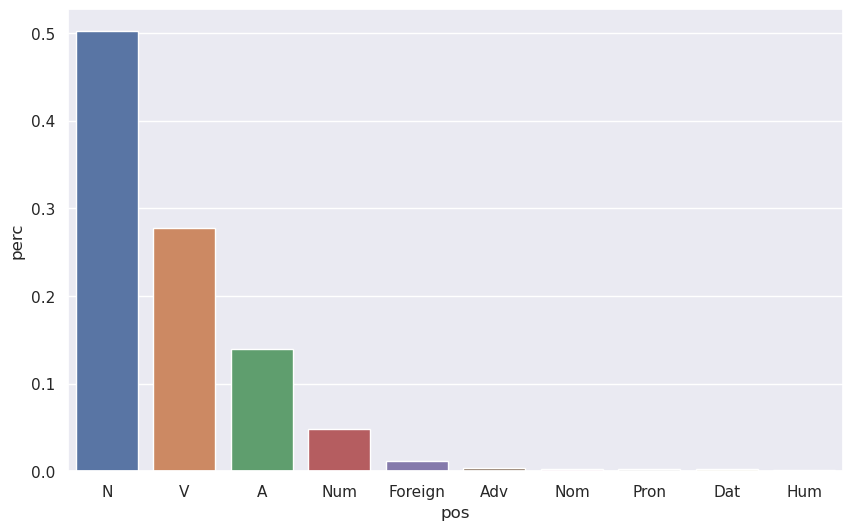

In [65]:
plt.figure(figsize=(10, 6))
sns.barplot(data=pos_tag_by_lemma.query('perc > 0.001'), x='pos', y='perc')

მათ შორის როგორც ვხედავთ ყველაზე ხშირად არსებითი სახელები, ზმნები და ზედსართავი სახელების ტიპის სიტყვები გვხვდება კორპუსში.

In [66]:
cumulative_freq = pos_tag_by_freq.copy()
cumulative_freq.pos_tag = cumulative_freq.pos_tag.apply(lambda x: x + ' + _' if x != 'N' else x)
cumulative_freq.freq = cumulative_freq.freq.cumsum()

<Axes: xlabel='freq', ylabel='pos_tag'>

findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not

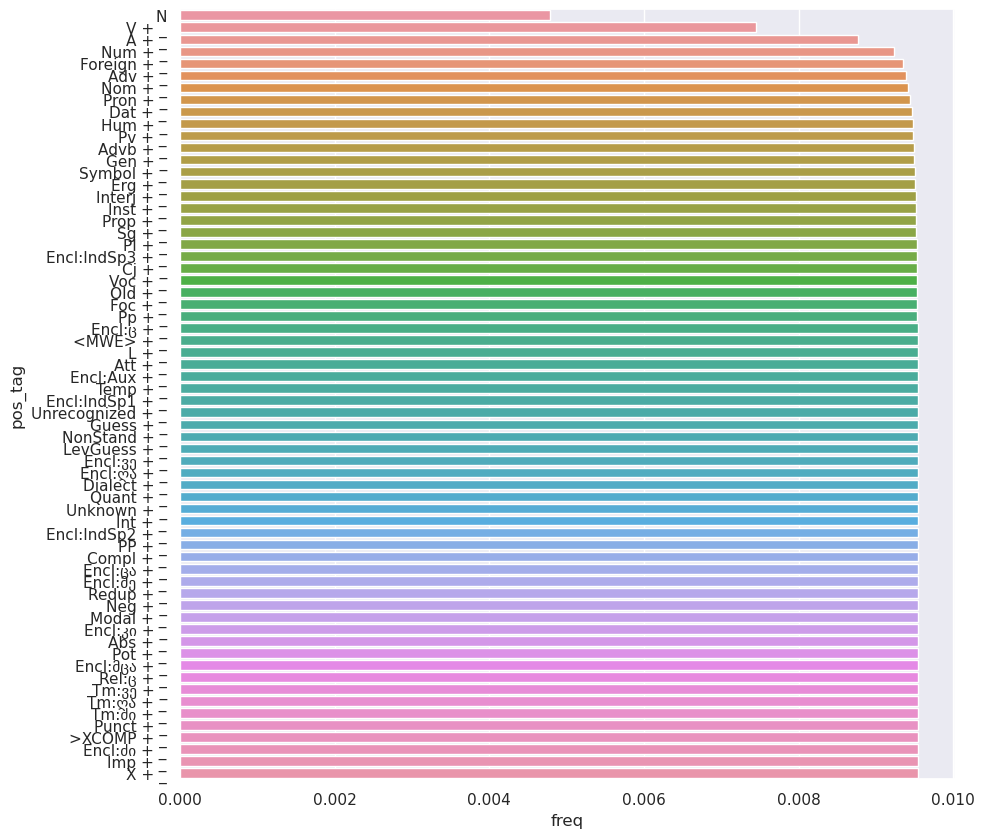

In [67]:
plt.figure(figsize=(10, 10))
sns.barplot(data=cumulative_freq.query('freq < 0.99'), y='pos_tag', x='freq', fill=True)

სიხშირეებს თუ დავაკვირდებით დავინახავთ, რომ 18 მეტყველების ნაწილის თეგი ასახავს ტექტში შეხვედრილი სიტყვების 99%

<Axes: xlabel='freq', ylabel='pos_tag'>

findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not

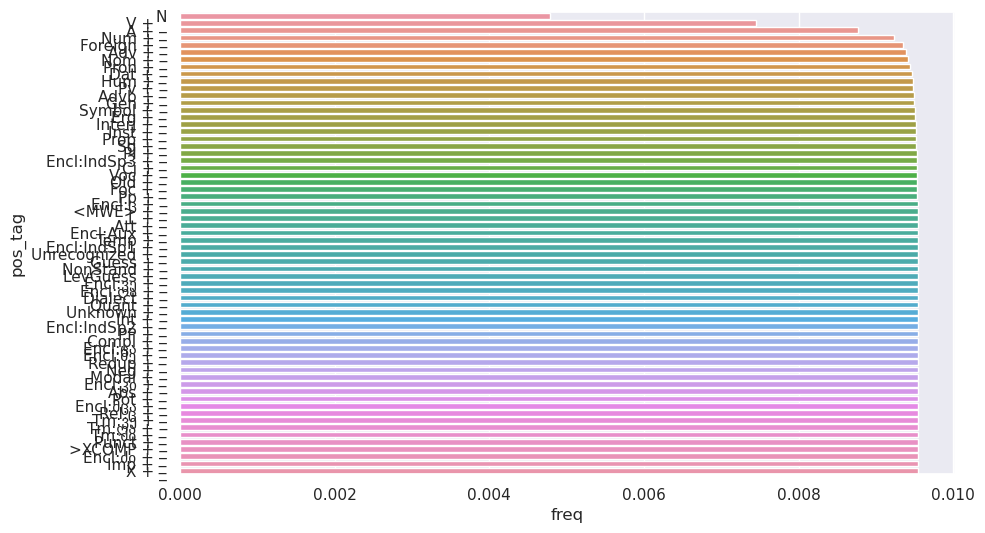

In [68]:
plt.figure(figsize=(10, 6))
sns.barplot(data=cumulative_freq.query('freq < 0.90'), y='pos_tag', x='freq', fill=True)

In [69]:
plt.figure(figsize=(10, 6))
sns.barplot(data=pos_tag_by_freq.query('freq > 0.01'), x='pos_tag', y='freq')

ValueError: min() arg is an empty sequence

<Figure size 1000x600 with 0 Axes>

In [ ]:
plt.figure(figsize=(10, 8))
plt.ticklabel_format(style='plain', axis='x')
sns.barplot(data=pos_tag_by_lemma.query('perc < 0.00001'), y='pos', x='perc')

In [ ]:
plt.figure(figsize=(20, 6))
sns.countplot(data=df2,order=pd.value_counts(df2.pos_tag).loc[lambda x: x < 50].index, x='pos_tag')

In [ ]:
lexem_group_sizes = df2.groupby('lemma').word.count()
lexem_group_sizes = lexem_group_sizes.reset_index()

In [ ]:
lexem_group_sizes.columns = ['lemma', 'count']
freq_group = lexem_group_sizes.sort_values(by='count', ascending=False)[:10]

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=freq_group, x='lemma', y='count')

In [ ]:
len(df2.lemma.unique())

In [ ]:
def get_lexem_freq_by_pos(tag: str, num=10):
    common_lexem_group_sizes = (df2[df2['pos_tag'] == tag]
    .groupby('lemma')
    .freq.sum()
    .reset_index())
    common_lexem_group_sizes.columns = ['lemma', 'count']
    return common_lexem_group_sizes.sort_values(by='count', ascending=False)[:num]

In [ ]:
get_lexem_freq_by_pos('N')

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=get_lexem_freq_by_pos('N'), x='lemma', y='count')

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=get_lexem_freq_by_pos('V'), x='lemma', y='count')

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=get_lexem_freq_by_pos('A'), x='lemma', y='count')

In [ ]:
freq_lemma_df = df2.groupby('lemma').freq.sum().reset_index()
freq_lemma_df = freq_lemma_df.sort_values(by='freq', ascending=False)[:20]

In [ ]:
plt.figure(figsize=(20, 6))
sns.barplot(data=freq_lemma_df, x='lemma', y='freq')

In [ ]:
freq_lemma_df = df2.groupby(['lemma', 'pos_tag']).freq.sum().reset_index()
freq_lemma_df = freq_lemma_df.sort_values(by='freq', ascending=False)

In [ ]:
plt.figure(figsize=(20, 6))
sns.barplot(data=freq_lemma_df[freq_lemma_df['pos_tag'] == 'N'][:20], y='freq', x='lemma')

In [ ]:
plt.figure(figsize=(20, 6))
sns.barplot(data=freq_lemma_df[freq_lemma_df['pos_tag'] == 'V'][:20], y='freq', x='lemma')

In [ ]:
plt.figure(figsize=(20, 6))
sns.barplot(data=freq_lemma_df[freq_lemma_df['pos_tag'] == 'A'][:20], y='freq', x='lemma')

In [ ]:
df[df['lemma'] == '??']

In [ ]:
df2[df2['lemma'] == '??']

In [ ]:
cleaned_df[cleaned_df['word'] == 'დ']

In [ ]:
comb = df.join(df2, lsuffix='_old', rsuffix='_new', on='word')